Data source: https://www.kaggle.com/datasets/somesh24/sea-level-change?resource=download

In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
from datetime import timedelta, datetime

In [72]:
df = pd.read_csv("sea_levels_2015.csv")
df["Time"] = pd.to_datetime(df["Time"])
df["GMSL"] = df["GMSL"] - df.iloc[0]["GMSL"]
df["Year"] = df["Time"].dt.year

In [31]:
df

,Time,GMSL,GMSL uncertainty,Year
0,1880-01-15,0.0,24.2,1880
1,1880-02-15,11.9,24.2,1880
2,1880-03-15,18.7,24.2,1880
3,1880-04-15,24.8,24.2,1880
4,1880-05-15,24.3,24.2,1880
...,...,...,...,...
1603,2013-08-15,254.6,8.8,2013
1604,2013-09-15,251.8,8.8,2013
1605,2013-10-15,249.4,8.9,2013
1606,2013-11-15,242.7,9.0,2013


(-10.0, 310.0)

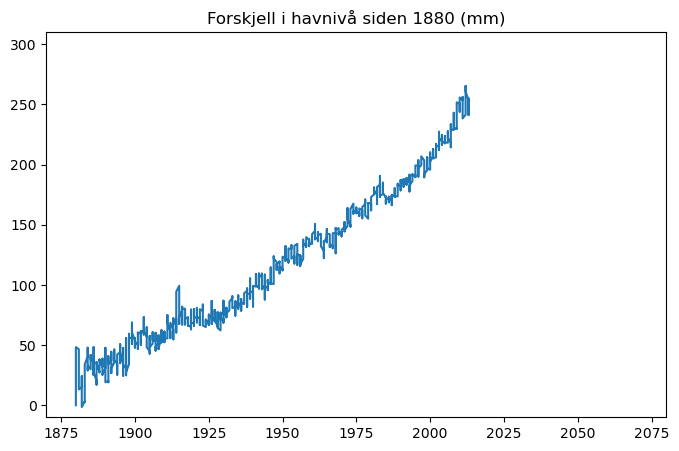

In [70]:
plt.figure(figsize=(8, 5))
plt.plot(df["Year"], df["GMSL"])
plt.title("Forskjell i havnivå siden 1880 (mm)")
plt.xlim(1870, 2080)
plt.ylim(-10, 310)m

In [10]:
def model_linear(t, a, b):
    return t * a + b

In [34]:
coeffs_linear, _ = curve_fit(model_linear, df["Year"], df["GMSL"])

In [46]:
model_xs = np.linspace(1880, 2070, 1000)
model_ys = model_linear(model_xs, *coeffs_linear)

(-10.0, 310.0)

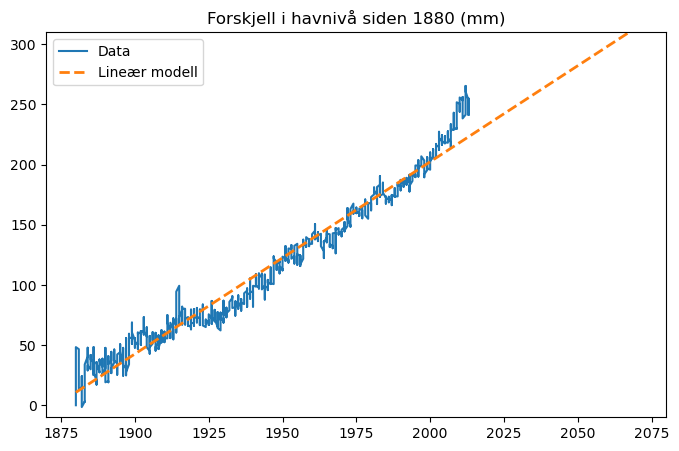

In [71]:
plt.figure(figsize=(8, 5))
plt.plot(df["Year"], df["GMSL"], label="Data")
plt.plot(model_xs, model_ys, label="Lineær modell", lw=2, ls="--")
plt.legend()
plt.title("Forskjell i havnivå siden 1880 (mm)")
plt.xlim(1870, 2080)
plt.ylim(-10, 310)